# **YOLOv8 for geographical feature detection**

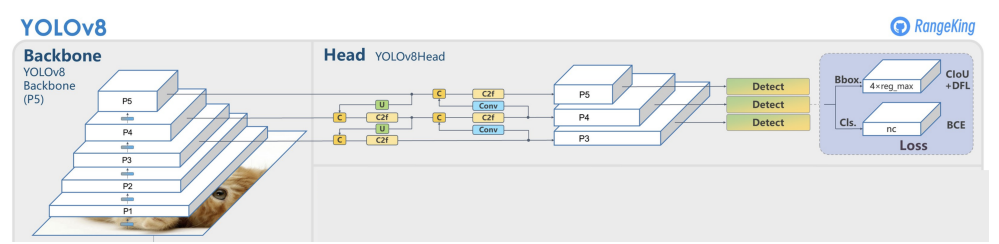

Installing ultralytics library

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.8/750.8 kB 6.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
from ultralytics import YOLO

Mounting google drive

In [ ]:
%cd /content/drive/MyDrive/data3

/content/drive/MyDrive/data3


clone github library

In [ ]:
!git clone https://github.com/ultralytics/ultralytics

fatal: destination path 'ultralytics' already exists and is not an empty directory.


Training YOLO v8 model on preprocessed dataset. path to train and test images , annotations and class labels are available in yaml2.yaml file

In [ ]:
!yolo task=detect mode=train data=/content/drive/MyDrive/data3/yaml2.yaml model=/content/drive/MyDrive/data3/yolov8.yaml epochs=250 imgsz=1024 optimizer=AdamW lr0=0.0001

WARNING ⚠️ no model scale passed. Assuming scale='n'.
Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/data3/yolov8.yaml, data=/content/drive/MyDrive/data3/yaml2.yaml, epochs=250, time=None, patience=100, batch=16, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fra

Test model on new image

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/data3/runs/detect/train3/weights/best.pt source="/content/drive/MyDrive/data3/Valley_000128.jpg"

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8 summary (fused): 168 layers, 3006818 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/data3/Valley_000128.jpg: 736x800 2 Valleys, 399.2ms
Speed: 24.8ms preprocess, 399.2ms inference, 1981.2ms postprocess per image at shape (1, 3, 736, 800)
Results saved to runs/detect/predict8
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
#Code to plot epoch v/s mAP50 plot
import pandas as pd
import matplotlib.pyplot as plt

csv_file = "/content/drive/MyDrive/data3/runs/detect/train4/results.csv"

data = pd.read_csv(csv_file)
x_col_index = 0
y_col_index = 6


x = data.iloc[:, x_col_index]
y = data.iloc[:, y_col_index]
plt.plot(x, y)
plt.xlabel('epoch')
plt.ylabel('metrics/mAP50')
plt.title('epoch v/s mAP50 plot')
plt.grid(True)
plt.show()

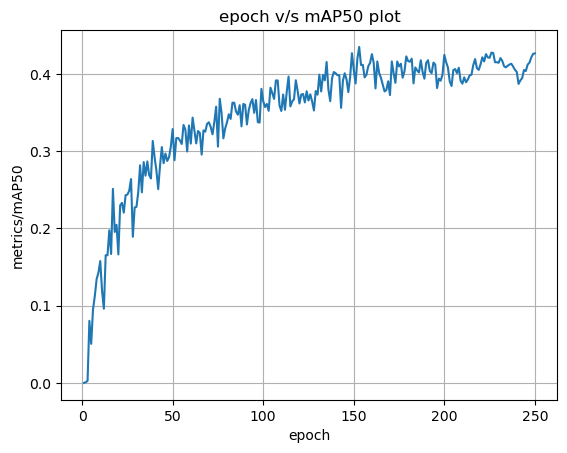

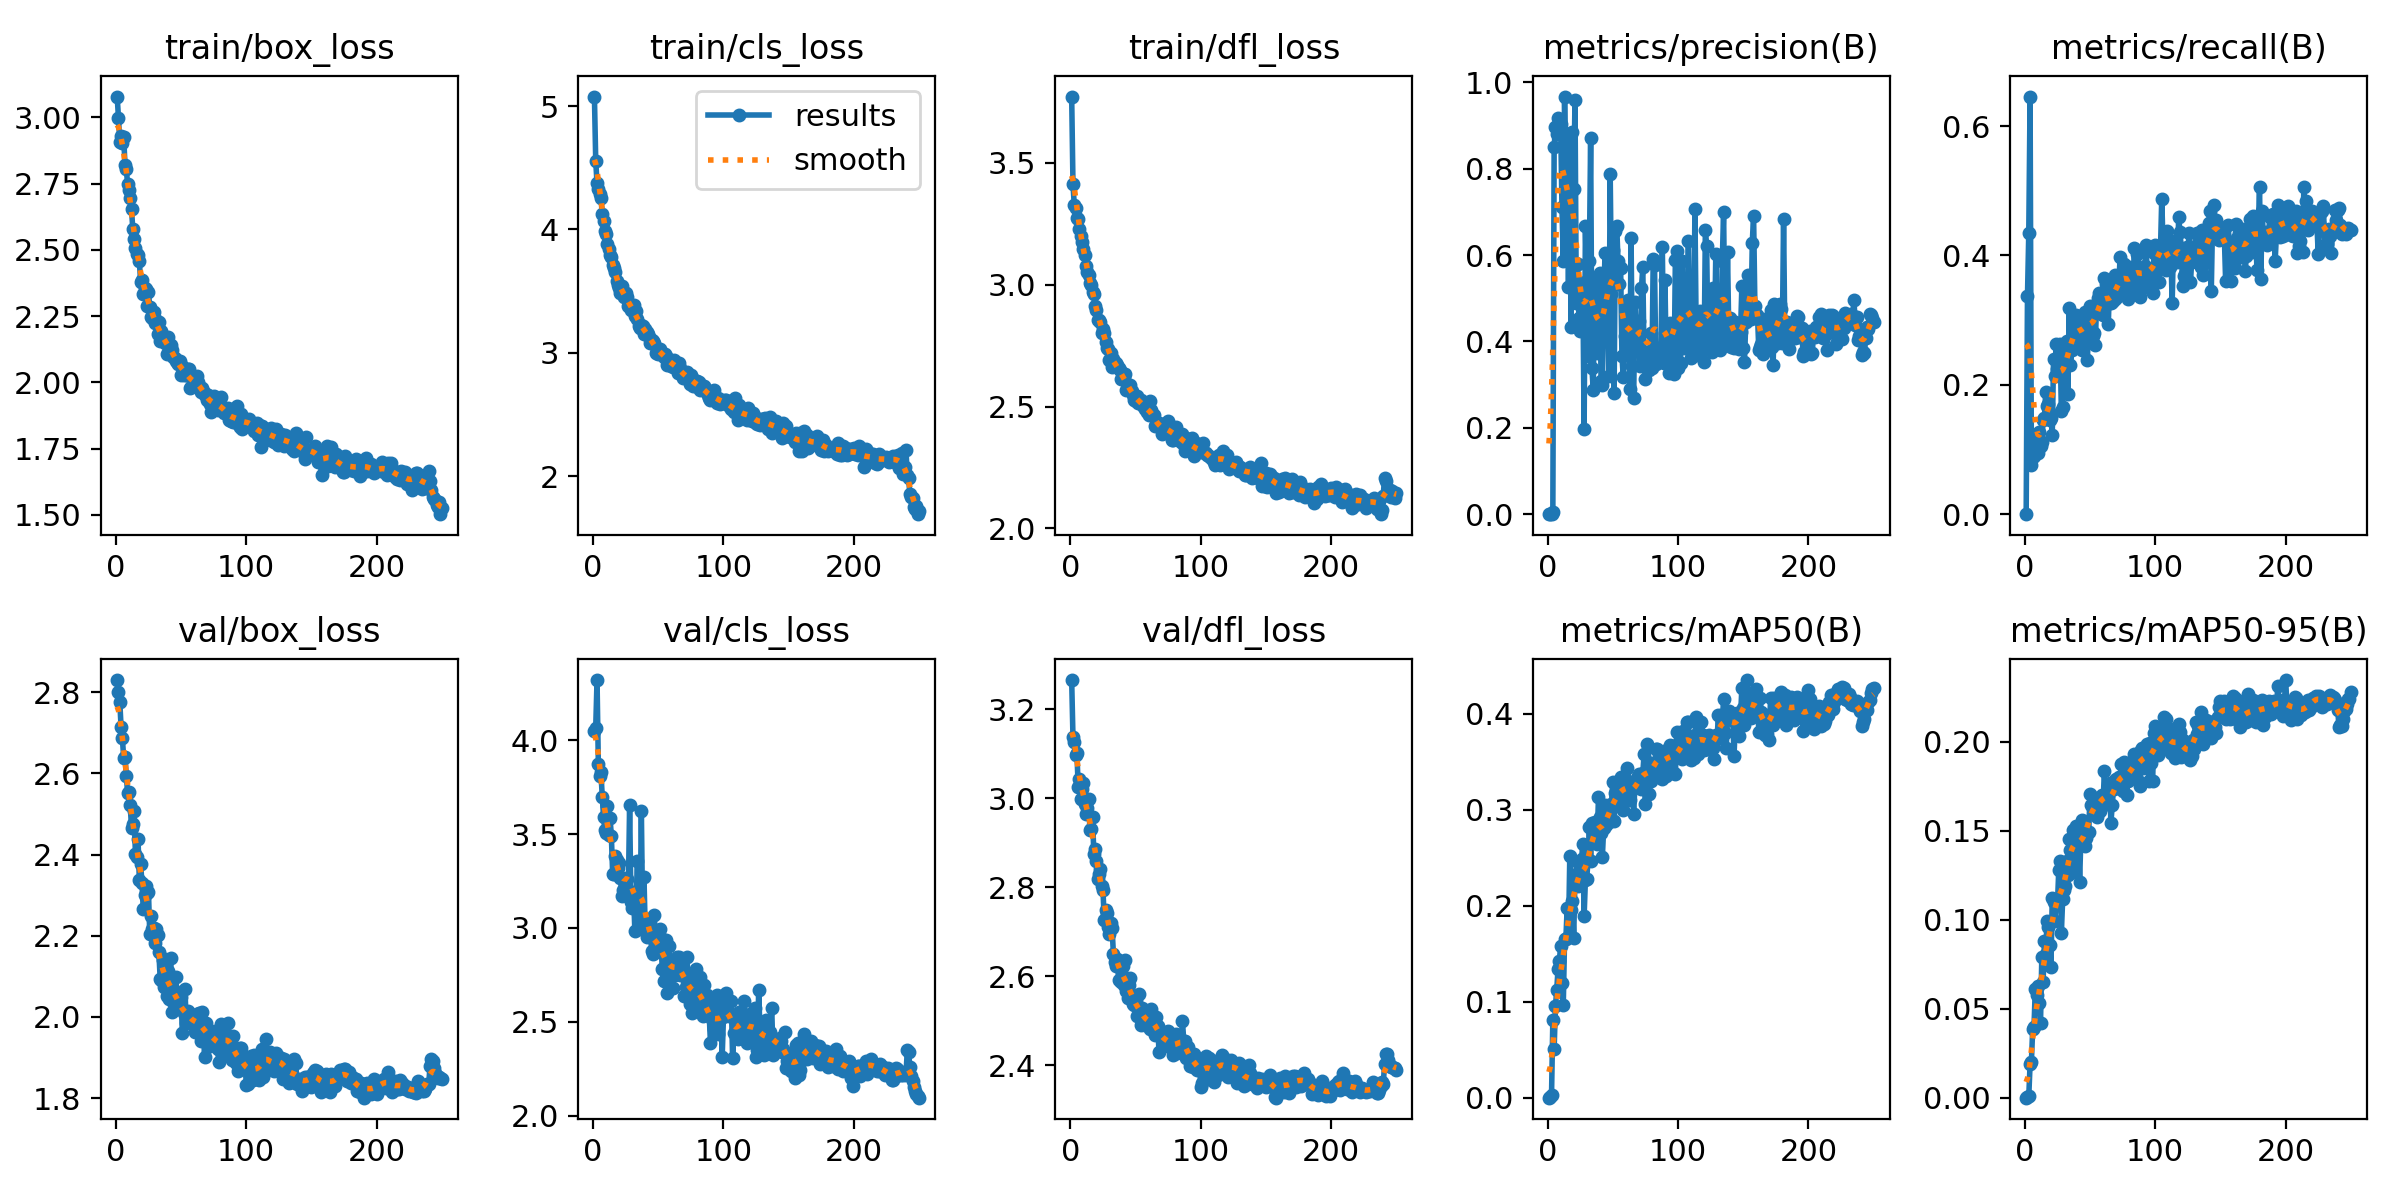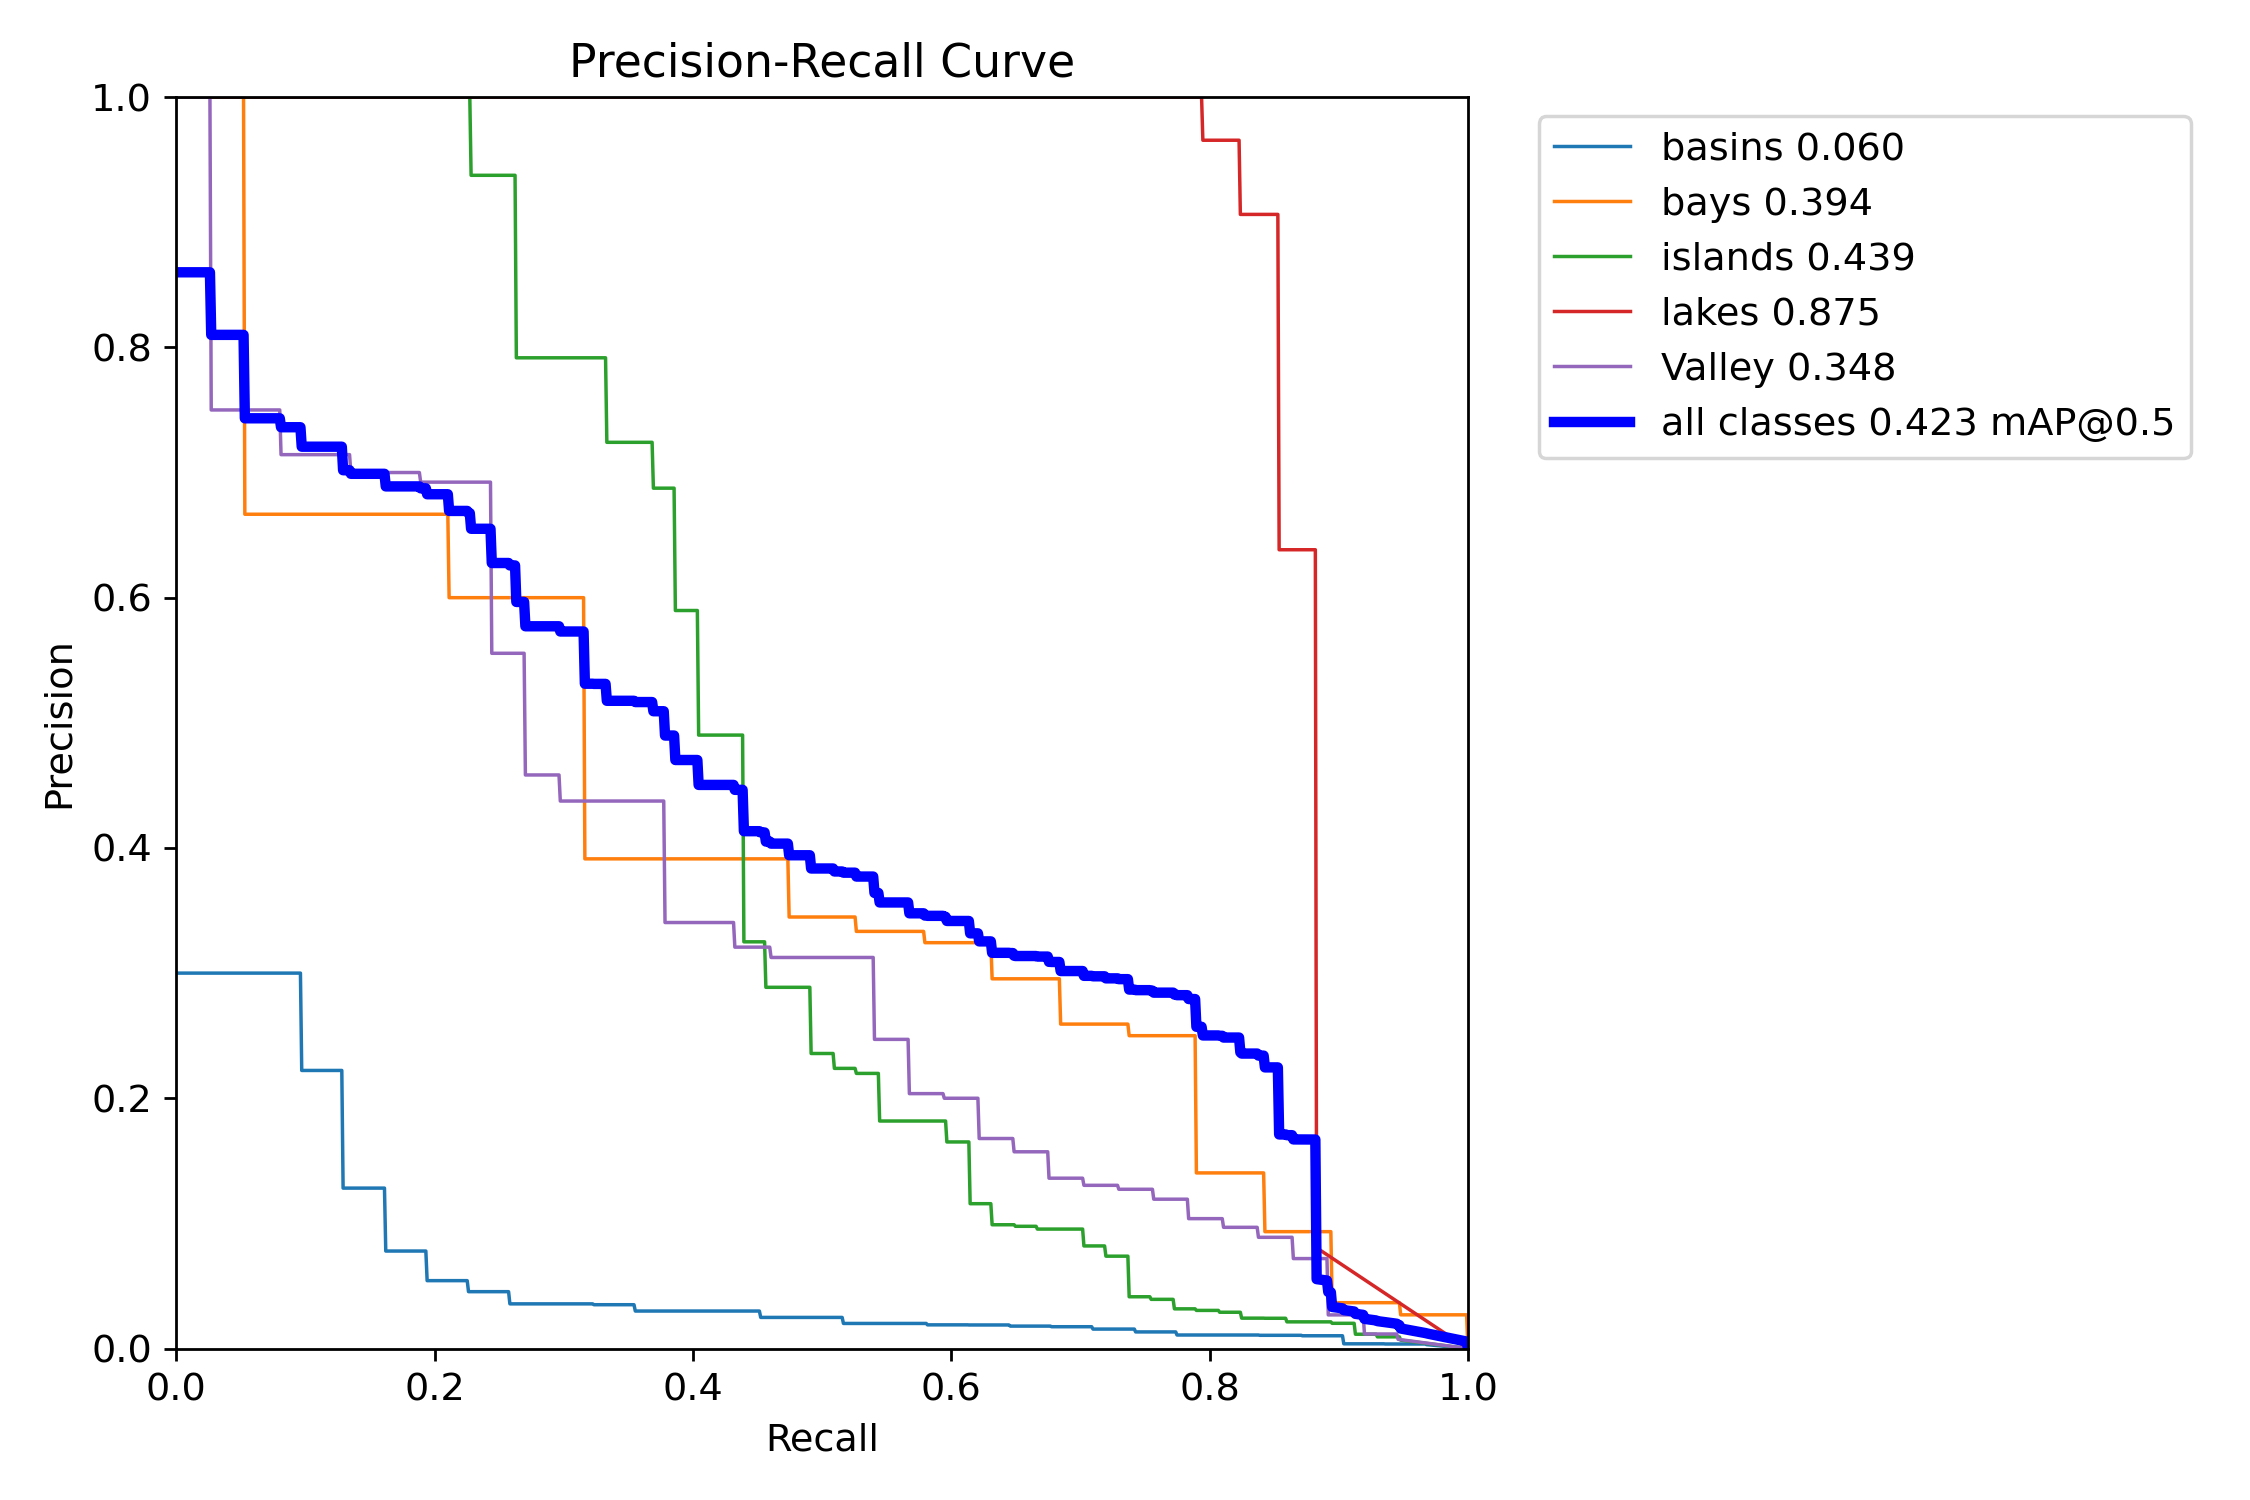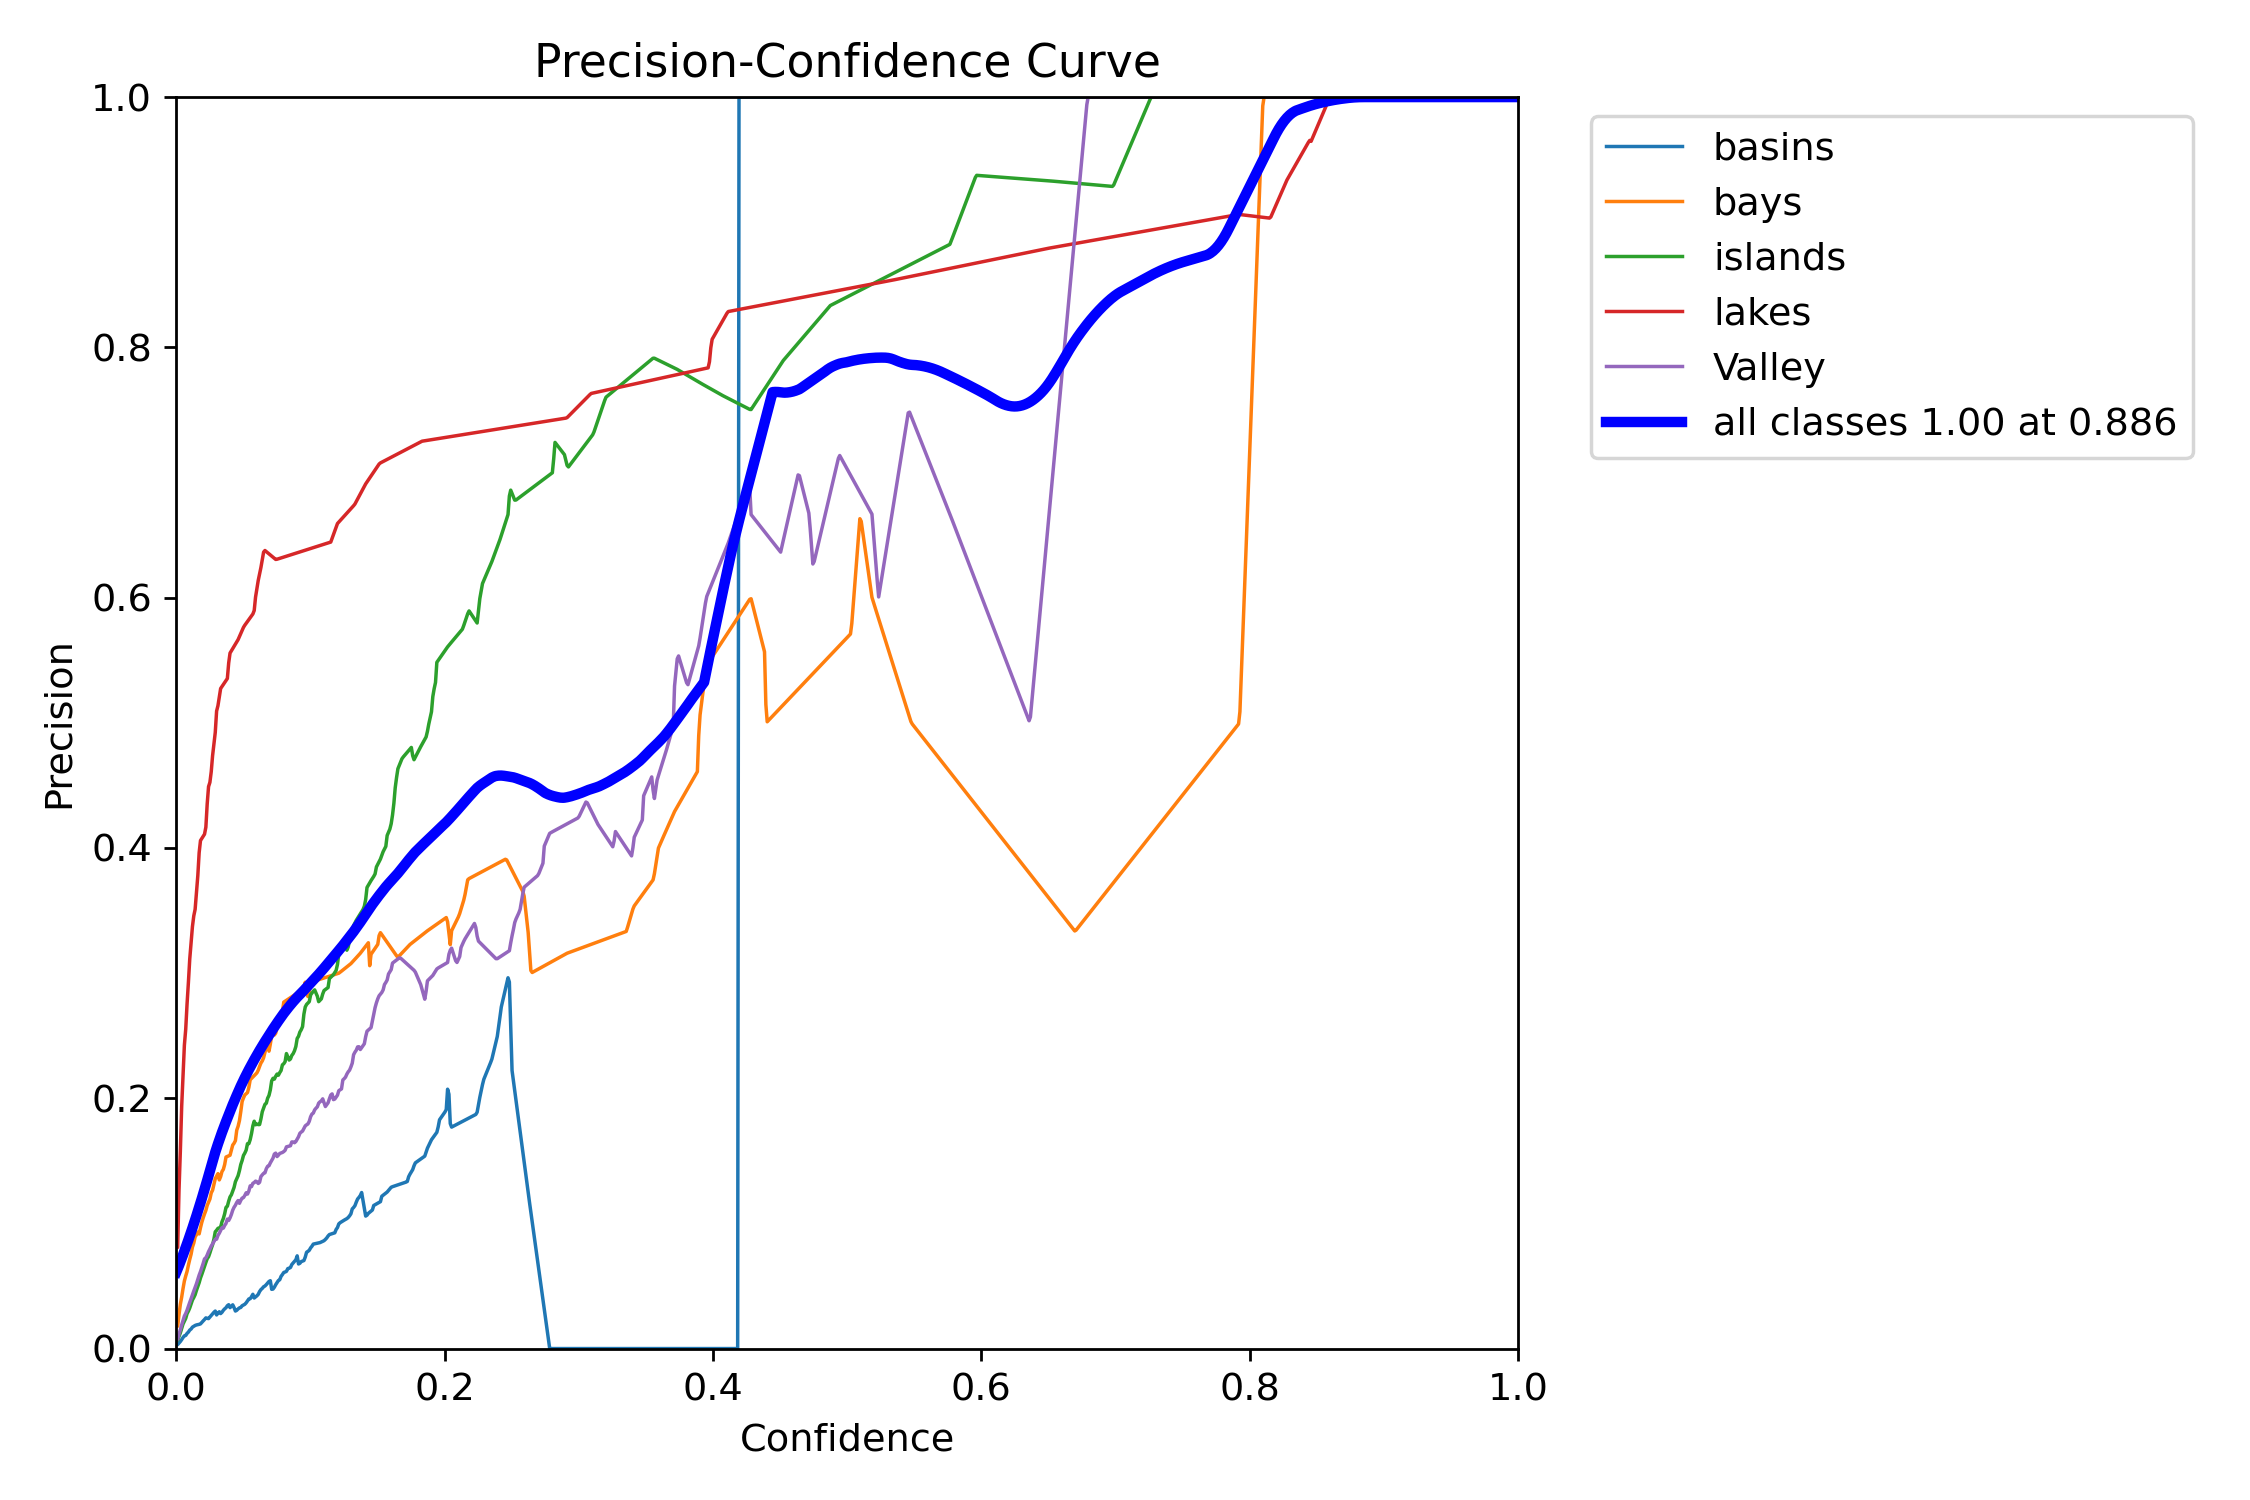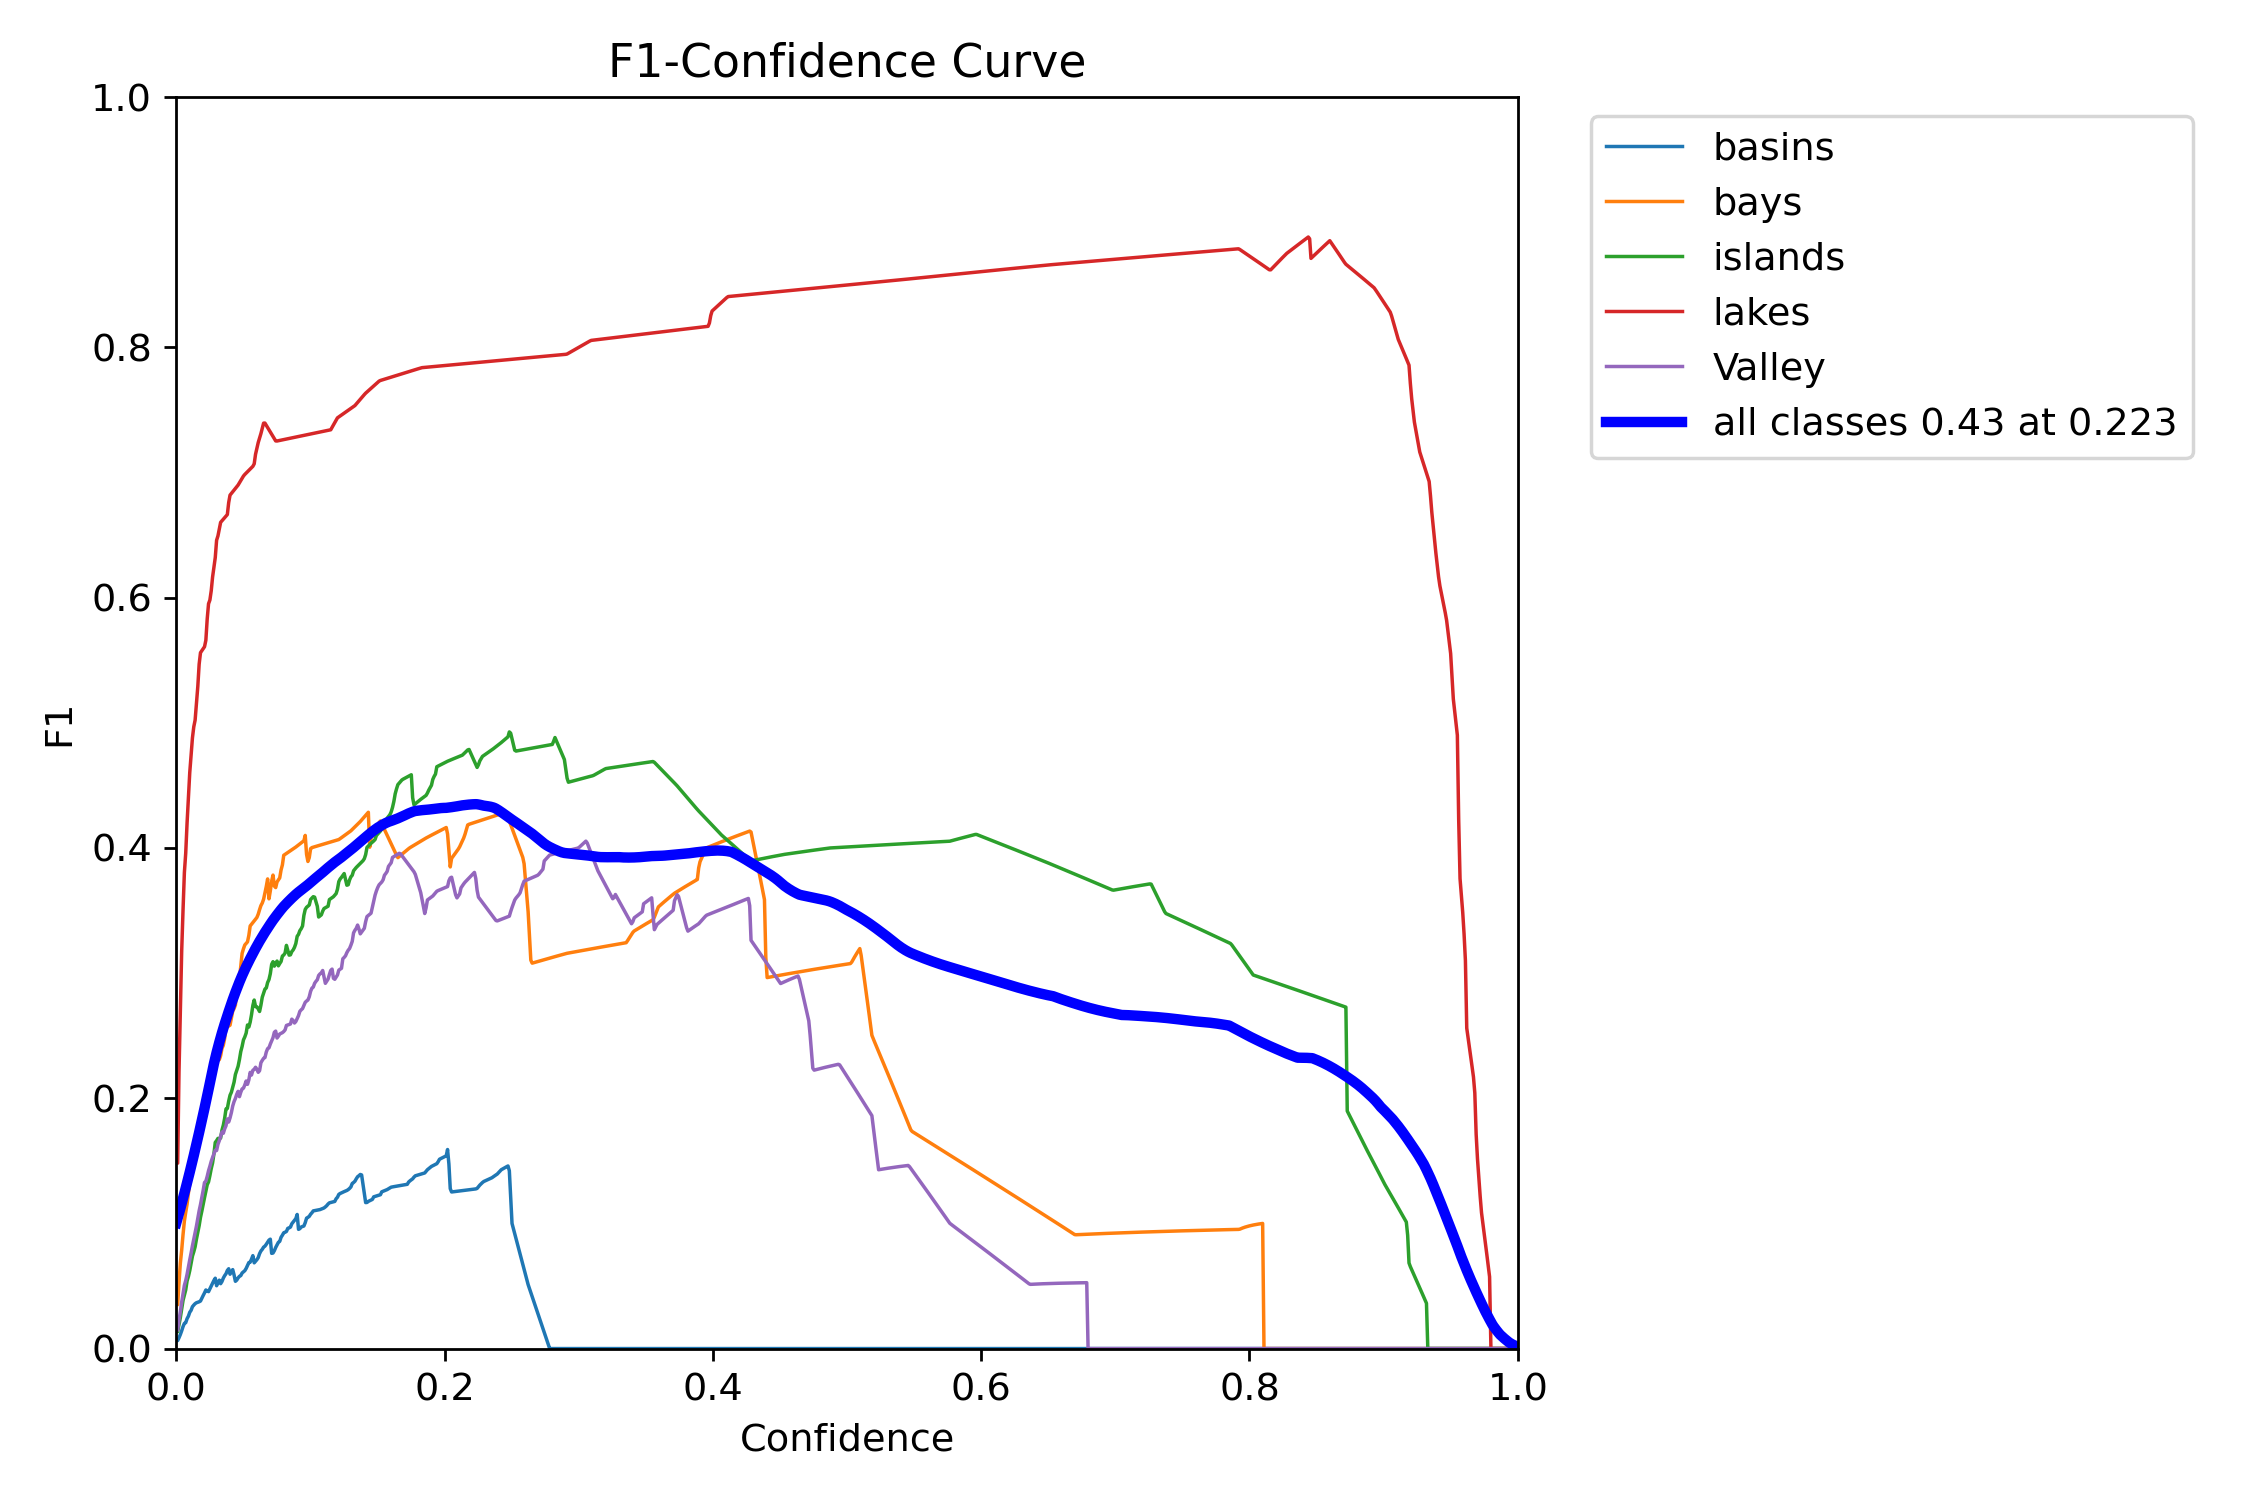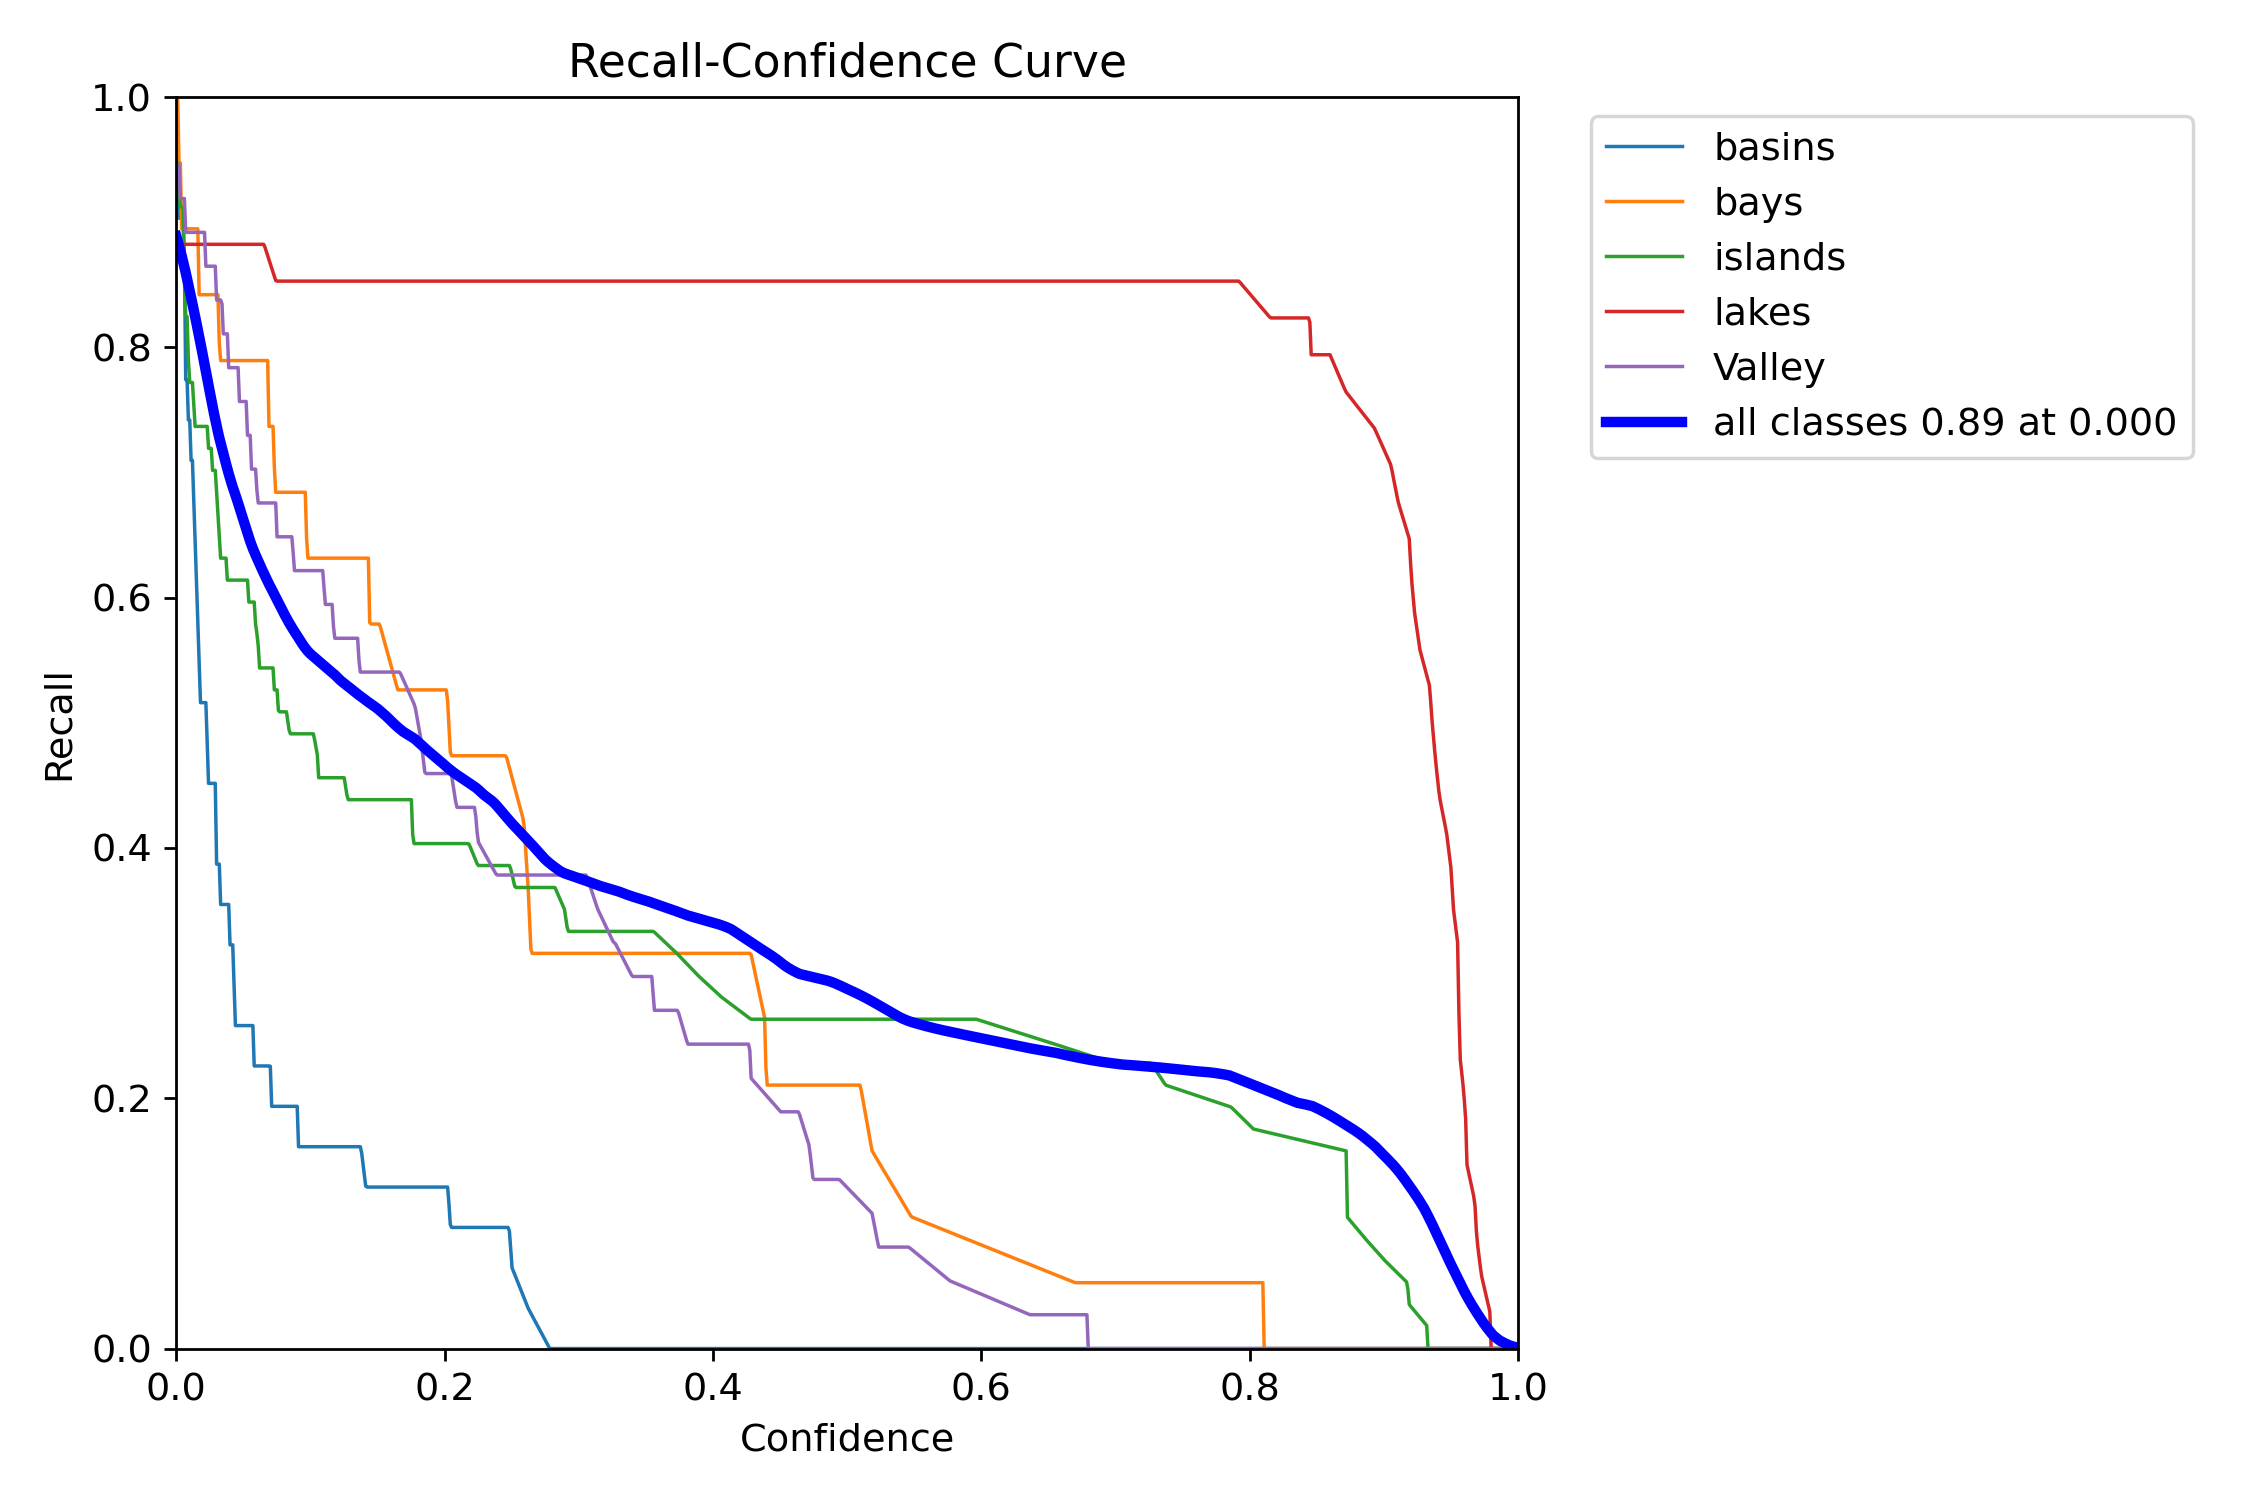